In [9]:
import numpy as np
import complexplorer as cx
import matplotlib.pyplot as plt
from functools import reduce

plt.rcParams["figure.figsize"] = (3, 3)

# Domains

A domain is represented by a function which accepts numpy arrays of complex values and returns like-shaped arrays of boolean
values. This function is stored in the `Domain.infunc` attribute. True values correspond to input points that belong 
to the domain and False to the ones that do not.
A viewing window determines a rectangular region of complex plane which is meshed and returned by `Domain.mesh(n)` method. 
Integer n defines the number of mesh points of the longer axis of the window region (either real or imaginary).
Note that this method returned a 2D numpy array containing a complex mesh of the viewing window with no regard to 
the mask function. `Domain.domain(n)` method performs a similar meshing operation but returns a 2D complex mesh with
points outside of the domain set to `numpy.nan`. `Domain.inmask(n)` returns a Boolean 2D array corresponding to 
a respective mesh with Boolean values marking points that belong (True) or do not belong (False) to the domain.

Domain representation function is stored in the "mask" attribute of the Domain class. 
Viewing window is defined by `Domain.window_real` and `Domain.window_imag` attributes. Each stores a 2-tuple of real numbers 
which correspond to left/right (for window_real) or bottom/top (for window_imag) coordinates of the viewing window.

## Classes:

* `Domain`: This class serves as the base class for defining complex domains. It encapsulates 
the meshing and masking functionality of a `Domain` instance.

* `Rectangle`: A subclass of `Domain`, the `Rectangle` class allows the creation of rectangular domains centered at a given point. 
It takes the length (real and imaginary) of the rectangle and the center point as input.

* `Disk`: Another subclass of `Domain`, the `Disk` class enables the creation of circular domains (disks) centered at a given point.
It requires specifying the radius of the disk and the center point.

* `Annulus`: The `Annulus` class, also a subclass of `Domain`, enables the creation of annular domains (rings) centered at a given point.
It requires specifying the inner and outer radii and the center point.

## Domain basics

In [2]:
domain = cx.Rectangle(4, 4)

In [3]:
z = np.arange(-3,4)
isin  = domain.infunc(z)
print('Is z in the domain?')
for i, j in zip(z, isin):
    print(f"z={i} => {j}")

Is z in the domain?
z=-3 => False
z=-2 => True
z=-1 => True
z=0 => True
z=1 => True
z=2 => True
z=3 => False


### Deferred evaluation

Domain mesh evaluation is deferred. It is typically executed inside a plotting function. Mesh size is determined by the parameter `n` (number of mesh points along the longer axis of the viewing window).

In [5]:
domain.mesh(5)

array([[-2.-2.j, -1.-2.j,  0.-2.j,  1.-2.j,  2.-2.j],
       [-2.-1.j, -1.-1.j,  0.-1.j,  1.-1.j,  2.-1.j],
       [-2.+0.j, -1.+0.j,  0.+0.j,  1.+0.j,  2.+0.j],
       [-2.+1.j, -1.+1.j,  0.+1.j,  1.+1.j,  2.+1.j],
       [-2.+2.j, -1.+2.j,  0.+2.j,  1.+2.j,  2.+2.j]])

### Viewing window

By default domain viewing window is constrained to a square region. This behavior is controlled via the `square` optional boolean parameter of every `Domain` subclass. If it is False, the window is evaluated as the minimum rectangle region that fits the domain.

In [4]:
print('Viewing window defintion')
print('Real axis range:', domain.window_real)
print('Imaginary axis range:', domain.window_imag)

Viewing window defintion
Real axis range: (-2.0, 2.0)
Imaginary axis range: (-2.0, 2.0)


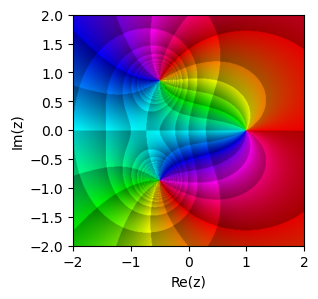

In [6]:
test_func = lambda z: (z - 1) / (z**2 + z + 1)
cx.plot(domain, test_func)

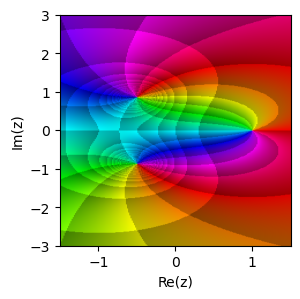

In [7]:
rectangle = cx.Rectangle(3, 6, square=False)
cx.plot(rectangle, test_func)

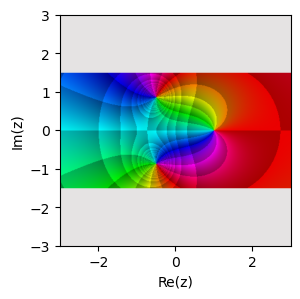

In [8]:
rectangle_constrained = cx.Rectangle(6, 3, square=True)
cx.plot(rectangle_constrained, test_func)

## Other domains

More complex domains can be defined using dedicated classes or unions and intersections of domain instances. Points outside of the domain are colored using `out_of_domain_hsv` optional parameter of `Cmap` classes. It is an HSV tuple with a default value of (0., 0.01, 0.9) (light-gray).

In [25]:
annulus = cx.Annulus(0.2, 2)

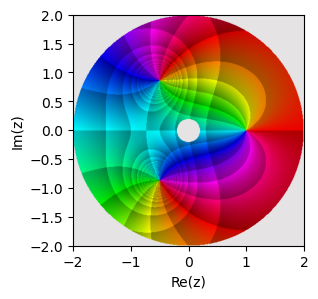

In [28]:
cx.plot(annulus, test_func)

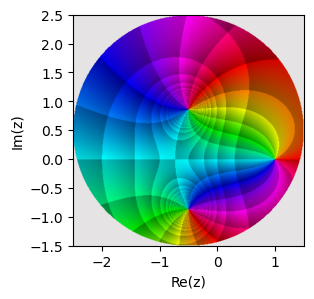

In [27]:
disk = cx.Disk(2, center=-0.5+0.5j)
cx.plot(disk, test_func)

### Unions and intersections of domains

Imagination is the limit here!

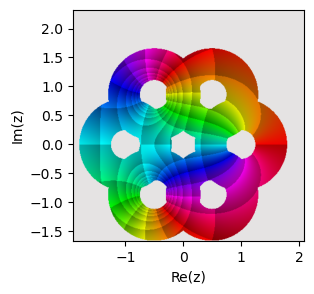

In [16]:
def make_wild_domain(r=1, n_phi=6, r0=0.25, r1=0.8):
    domains = []
    for i in range(n_phi):
        center = r*np.exp(2*np.pi / n_phi * 1j * i)
        domains.append(cx.Annulus(r0, r1, center))
    return reduce(lambda x,y: x.union(y), domains)

wild_domain = make_wild_domain()
cx.plot(wild_domain, test_func)

## Color maps

Color maps enable [domain coloring](https://en.wikipedia.org/wiki/Domain_coloring) in `complexplorer` library. 
A color map is represented by a class which defines a function that 
converts input complex values into numpy arrays of HSV or RGB values, 
with individual H/S/V or R/G/B values mapped to [0, 1] interval. 
Input values which correspond to the True values of the like-shaped 
outmask array (values outside of the domain) are set to 
OUT_OF_DOMAIN_COLOR_HSV color. Nearly every aspect of class instance 
behavior is configurable via constructor parameters.

## Classes:

- `Cmap`: This class serves as a base class for color maps and defines 
an informal interface for child color map classes. It implements 
the `*.hsv()` and `*.rgb()` methods which are used to convert 
input complex values to HSV and RGB-valued arrays.

- `Phase`: This class implements a phase color map. It can be used
to generate regular phase color maps or enhanced phase color maps.

- `Chessboard`: This class implements a chessboard color map.

- `PolarChessboard`: This class implements a polar chessboard color map.

- `LogRings`: This class implements a logarithmic black and white rings color map.

In [17]:
cx.Phase?

Init signature:
cx.Phase(
    n_phi: Optional[int] = None,
    r_linear_step: float = None,
    r_log_base: Optional[float] = None,
    v_base: float = 0.5,
    out_of_domain_hsv=(0.0, 0.01, 0.9),
)
Docstring:      Cmap class defines a function that returns a color map corresponding to input complex matrix
Init docstring:
Phase color map constructor.

Class implements both regular and enhanced phase color maps.
If any of the n_phi, r_linear_step, r_log_base are not None, 
output phase portrait is enhanced. If n_phi value is given,
the phase is used for enhancement, if either (or both) r_linear_step and 
r_log_base are given then modulus is used for enhancement.

Parameters:
----------
n_phi: int, optional
    Number of sectors used for enhanced color mapping of complex phase.
    The default is None (no enhanced color mapping of complex phase).
r_linear_step: float, optional
    Linear step value is used to divide input complex values and normalize 
    the modulus which is used for co

In [19]:
domain = cx.Rectangle(3, 3)
test_func = lambda z: (z - 1) / (z**2 + z + 1)

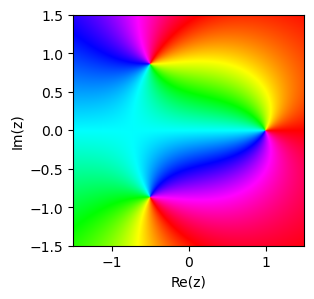

In [20]:
cx.plot(domain, test_func, cmap = cx.Phase())

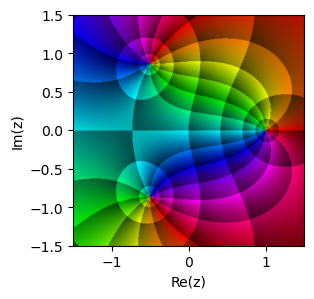

In [21]:
cx.plot(domain, test_func, cmap = cx.Phase(6, r_log_base=np.e, v_base=0.25))

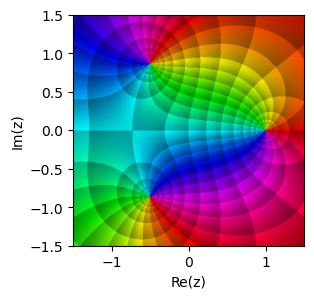

In [24]:
cx.plot(domain, test_func, cmap = cx.Phase(10, r_log_base=0.6, v_base=0.5))

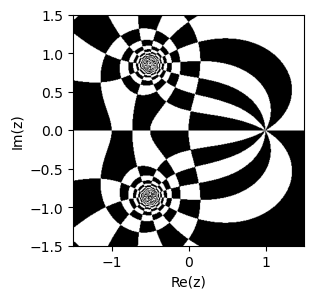

In [25]:
cx.plot(domain, test_func, cmap = cx.PolarChessboard(6))

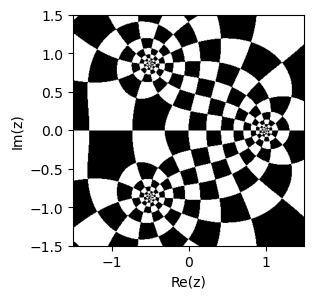

In [27]:
cx.plot(domain, test_func, cmap=cx.PolarChessboard(6, r_log=0.6))

Color maps can be used with any of the `complexplorer` plotting functions, including analytic landscape plots and Riemann sphere.

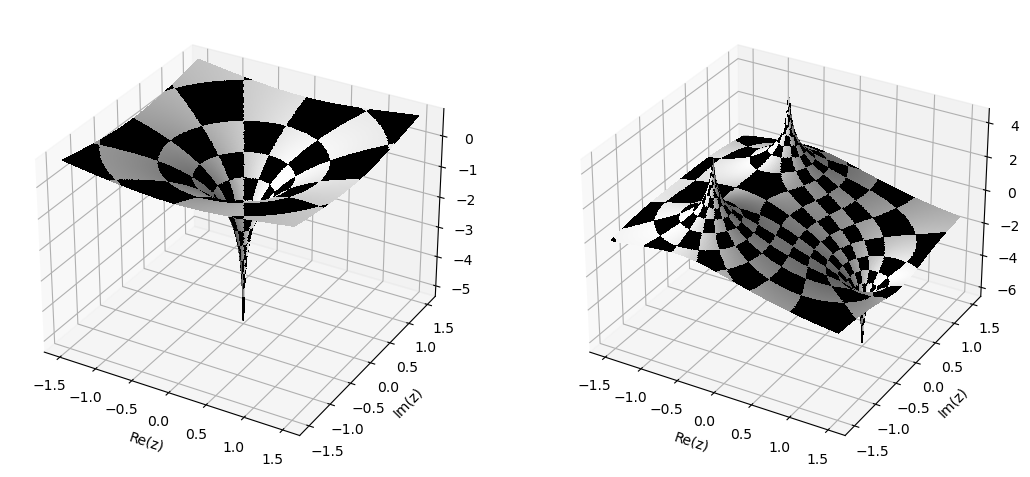

In [28]:
cx.pair_plot_landscape(domain, test_func, cmap=cx.PolarChessboard(6, r_log=0.6), zaxis_log=True, z_max=100)

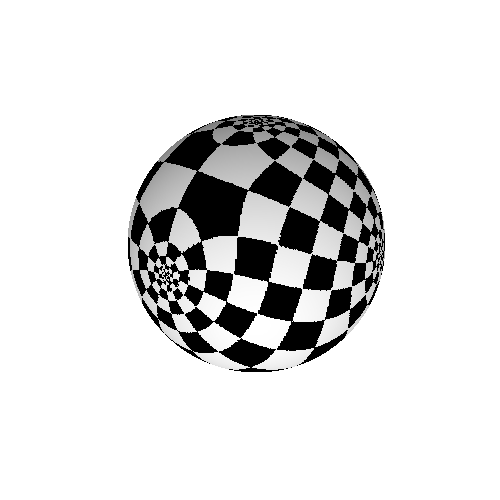

In [29]:
_ = cx.riemann(test_func, n=600, project_from_north=True, cmap=cx.PolarChessboard(6, r_log=0.6))